In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train, y_train),(X_test, y_test) = datasets.fashion_mnist.load_data()

In [15]:
print("Training data shape : " , X_train.shape)
print("Testing data shape : " , X_test.shape)

Training data shape :  (60000, 28, 28)
Testing data shape :  (10000, 28, 28)


In [18]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

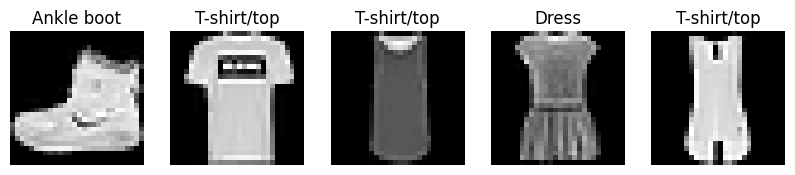

In [19]:
plt.figure(figsize=(10,2))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(X_train[i], cmap = 'gray')
  plt.title(class_names[y_train[i]])
  plt.axis('off')
plt.show()

In [20]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [21]:
X_train = X_train.reshape(-1,28,28,1)
x_test = X_test.reshape(-1,28,28,1)

In [22]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [23]:
X_train, X_val, y_train_cat, y_val_cat = train_test_split(X_train, y_train_cat, test_size = 0.1, random_state = 42)

In [24]:
print("After Split")
print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

After Split
Train: (54000, 28, 28, 1)
Validation: (6000, 28, 28, 1)
Test: (10000, 28, 28)


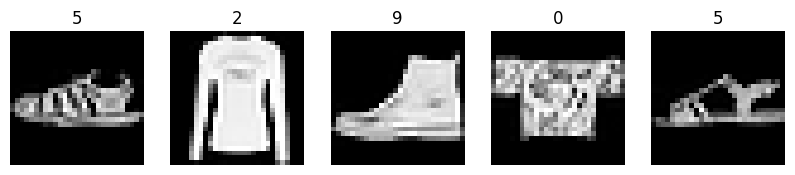

In [26]:
plt.figure(figsize=(10,2))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(X_train[i].reshape(28,28), cmap = 'gray')
  plt.title(np.argmax(y_train_cat[i]))
  plt.axis('off')
plt.show()

In [29]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

C:\Users\MSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
vertical_filter = np.array([[1,0,-1],
                            [1,0,-1],
                            [1,0,-1]])
horizontal_filter = np.array([[1,1,1],
                              [0,0,0],
                              [-1,-1,-1]])

In [32]:
sample_image = X_train[0].reshape(28,28)

In [33]:
from scipy.signal import convolve2d

In [34]:
vertical_edges = convolve2d(sample_image, vertical_filter, mode='same', boundary='fill', fillvalue=0)
horizontal_edges = convolve2d(sample_image, horizontal_filter, mode='same', boundary='fill', fillvalue=0)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

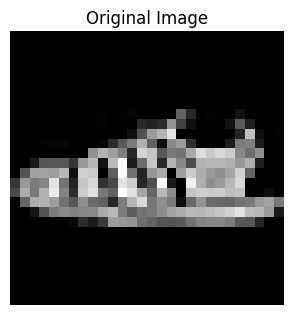

In [35]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(sample_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

In [37]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
history = model.fit(X_train, y_train_cat, epochs=108,
                    validation_data=(X_val, y_val_cat))

Epoch 1/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8044 - loss: 0.5431 - val_accuracy: 0.8695 - val_loss: 0.3445
Epoch 2/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8699 - loss: 0.3646 - val_accuracy: 0.8908 - val_loss: 0.3090
Epoch 3/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.8860 - loss: 0.3169 - val_accuracy: 0.8947 - val_loss: 0.2804
Epoch 4/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8954 - loss: 0.2864 - val_accuracy: 0.8995 - val_loss: 0.2699
Epoch 5/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9026 - loss: 0.2643 - val_accuracy: 0.9043 - val_loss: 0.2594
Epoch 6/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9101 - loss: 0.2441 - val_accuracy: 0.9130 - val_loss: 0.2445
Epoch 7/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9141 - loss: 0.2313 - val_accuracy: 0.9135 - val_loss: 0.2415
Epoch 8/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9216 - loss: 0

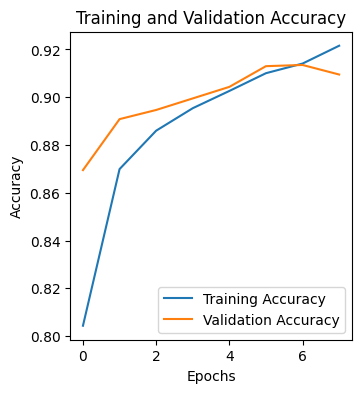

In [41]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

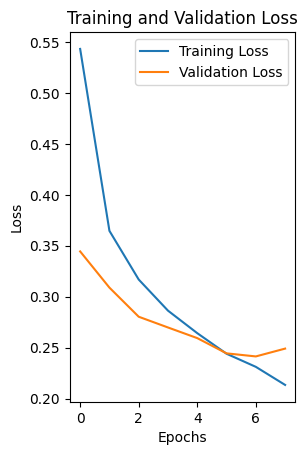

In [42]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [45]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 90s 1us/step


In [47]:
print("Training data shape : " , X_train.shape)
print("Validation data shape : " , X_test.shape)

Training data shape :  (50000, 32, 32, 3)
Validation data shape :  (10000, 32, 32, 3)
